# **🎮 Project 1: 다음 분기에 어떤 게임을 설계해야 할까?**




 - **Part 1. Data Wrangling**
    1. 데이터 수집
    2. 데이터 탐색
    3. 데이터 정제
    
 - **Part 2. EDA**
    1. Feature Enginering
    2. 통계값 분석 및 시각화<br>

       2-1. 연도별 게임의 트렌드<br>
       2-2. 지역별 선호 게임 장르<br>
       2-3. 지역별 선호 게임 플랫폼<br>
       2-4. 지역별 선호 게임 회사<br>
       2-5. 2010~2016년 Top20 게임
 - **Part 3. Conclusion**
    1. 장르
    2. 플랫폼
    3. 게임회사

# **Part 1. Data Wrangling**
<br>

####**Data Description**
> - **`Name`**: 게임의 이름
- **`Platform`**: 게임이 지원되는 플랫폼의 이름
- **`Year`** : 게임이 출시된 연도
- **`Genre`** : 게임의 장르
- **`Publisher`** : 게임을 제작한 회사
- **`NA_Sales`** : 북미지역에서의 출고량
- **`EU_Sales`** : 유럽지역에서의 출고량
- **`JP_Sales`** : 일본지역에서의 출고량
- **`Other_Sales`** : 기타지역에서의 출고량

In [1]:
# 나눔(Nanum) 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf;

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

##**1. 데이터 수집**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2 (1).csv


In [4]:
vgames2 = pd.read_csv('vgames2.csv', index_col=0).reset_index(drop=True)

In [5]:
vgames2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


##**2. 데이터 탐색**


###**2-1. 품질의 문제**

####**a. 시각적 탐색**

In [6]:
vgames2.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [7]:
vgames2.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
vgames2.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)



> 🔎 
 - **Year**
   - 연도가 `float`형식으로 되어있습니다. `integer`형식으로 변환해주어야 합니다.
 - **NA_Sales, EU_Sales, JP_Sales, Other_Sales**
   - 각 컬럼에 있는 값들의 단위가 파악되지 않습니다.


####**b. 프로그래매틱 탐색**

**b-1. `info()`**

In [9]:
vgames2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [10]:
vgames2.Platform.unique()

array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
       'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
       'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
vgames2.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)



> 🔎
 - **Year**
   - 연도가 `float`형식으로 되어있습니다. `integer`형식으로 변환해주어야 합니다.
 - **NA_Sales, EU_Sales, JP_Sales, Other_Sales**
   - `object` 형식이므로 `float` 형으로 변환해주어야 합니다. 만약 후에 도메인 리서치로 해당 컬럼들의 단위를 확인해 값을 변형하게 된다면 `int`형으로 변환하게 될 수도 있습니다.
 - **Platform, Genre**
   - **Platform**과 **Genre** 데이터를 `category` 형식으로 변환하기 적절한지 확인해보기 위해 unique한 value들을 확인해보았습니다. `category` 형식으로 변환하기에는 value의 종류가 너무 많다고 판단됩니다.
   - *e.g. Since we only have 3 colors of shirts, then that is a good categorical variable. However, “color” could represent thousands of values in other situations so it would not be a good choice. There is no hard and fast rule for how many values a categorical value should have. You should apply your domain knowledge to make that determination on your own data sets.*
   - *https://pbpython.com/pandas_dtypes_cat.html*
   - *https://www.formpl.us/blog/categorical-data*
 - **Year, Genre, Publisher**
  - 해당 컬럼들에 missing values가 있음을 확인할 수 있습니다. 이 missing values는 리서치를 통해 채워넣을 수 있을 것으로 보입니다,
  - `info()`를 통해 확인했을 때 개수 상으로는 결측치가 없어보여도 실제로는 결측치들이 `-`, `/`, `None`과 같은 문자열로 표시되어 있을 수 있다.



**b-2. `describe()`**

 - **NA_Sales, EU_Sales, JP_Sales** 컬럼의 데이터 타입이 `object`이기 때문에 **descriptive states**를 볼 수 없는 상황입니다.
 - 지금은 데이터를 정제가 아닌 탐색 단계이므로, 후에 정제 단계에서 해당 컬럼들을 numerical data types로 변환 후 확인합니다.

In [12]:
vgames2.describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


**b-3. `sample()`**

In [13]:
import numpy as np

np.random.seed(80)
vgames2.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3271,Akai Katana Shin,X360,2011.0,Shooter,Cave,0.04,0,0.01,0
2213,Metal Gear Solid,PS,1998.0,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24
15969,"BCFX: The Black College Football Xperience, Th...",X360,2009.0,Sports,Aspyr,0.15,0,0,0.01
8080,Point Blank,PS,1997.0,Shooter,Sony Computer Entertainment,0.05,0.03,0.23,0.02
10719,National Geographic Challenge!,X360,NaN,Misc,Unknown,0.06,0,0,0
8237,Winter Blast: 9 Snow & Ice Games,Wii,2010.0,Sports,Destineer,0.02,0,0,0
16069,Guitar Hero: Van Halen,Wii,2009.0,Misc,Activision,0.14,0.12,0,0.03
3152,NFL 2K1,DC,2000.0,Sports,Sega,1.02,0.05,0,0.02
9203,Rally Cross 2,PS,1998.0,Racing,989 Studios,0.19,0.13,0,0.02
16157,The Suffering,PS2,2004.0,Action,Midway Games,0.2,160K,0,0.05




> 🔎
 - **Publisher**
  - `Unknown` 데이터를 확인할 수 있습니다. 리서치를 통해 채워넣을 수 있을 것으로 보입니다.


In [14]:
np.random.seed(4)
vgames2.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10467,MLB 14: The Show,PSV,2014.0,Sports,Sony Computer Entertainment America,0.11,0,0,0.02
1773,Mortal Kombat vs. DC Universe,X360,2008.0,Fighting,Midway Games,1.53,0.24,0,0.16
6434,Just Dance 2016,PS4,2015.0,Misc,Ubisoft,0.16,0.13,0,0.06
13616,Bee Movie Game,Wii,2007.0,Action,Activision,0.31,0.01,0,0.03
8908,UnchainBlades EXXiV,3DS,2012.0,Role-Playing,FuRyu,0,0,0.02,0
6628,Nonomura Byoin no Hitobito,SAT,1996.0,Adventure,Elf,0,0,0.36,0
13263,WipeOut 3 The Game,WiiU,2012.0,Action,Activision,0.12,0,0,0.01
10567,Major League Baseball 2K7,X360,2007.0,Sports,Spike,0.67,0,0,0.05
14050,Breakaway IV,2600,NaN,Puzzle,Sears,0.2,0.01,0,0K
3032,Disgaea Infinite,PSP,2010.0,Adventure,Nippon Ichi Software,0.07,0,0.01,0.01


> 🔎
 - **Year**
  - **missing value**를 확인할 수 있습니다.
 - **Other_Sales**
   - `0K`라는 `object` 타입 데이터를 확인할 수 있습니다.

**b-4. `duplicated()`**

In [15]:
vgames2[vgames2.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


> 🔎
 - 2 rows가 중복된 것을 확인할 수 있습니다.
 - **BUT** 앞서 확인한 데이터의 오류들을 모두 정제한 후 다시 중복치가 있는지 확인해보아야 합니다.

**b-5. `sort_values()`**

 **i) NA_Sales, EU_Sales, JP_Sales, Other_Sales** 컬럼 정렬

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [17]:
vgames2.NA_Sales.sort_values()[-35:]

9495      6.82
1005      6.85
6458      6.91
9786      6.99
13557     600K
9456       60K
45         60K
8235       60K
6086       60K
3483      7.01
12600    7.03M
5820      7.28
6291      7.97
3328       70K
16330     720K
12517     770K
10301     770K
6393      8.25
5340      8.41
6236      8.52
3435      8.94
7109       80K
7023      820K
9416         9
2809      9.03
11137     9.07
10899     9.09
14669     9.43
14856     9.54
10913    9.63M
6248      9.67
10650     9.81
14347      90K
13798      90K
13057      90K
Name: NA_Sales, dtype: object

In [18]:
vgames2.EU_Sales.sort_values()

0           0
8370        0
8368        0
8365        0
8363        0
         ... 
6937     9.23
13229    9.26
3483     9.27
13830     90K
14318    960K
Name: EU_Sales, Length: 16598, dtype: object

In [19]:
vgames2.JP_Sales.sort_values()

0          0
7338       0
7339       0
7340       0
13095      0
        ... 
3212     80K
4270     80K
13456    80K
12501    90K
9115     90K
Name: JP_Sales, Length: 16598, dtype: object

In [20]:
vgames2.Other_Sales.sort_values()

0           0
8651        0
8656        0
8659        0
8660        0
         ... 
16143     70K
2908     8.46
16591     80K
7163      80K
2470      80K
Name: Other_Sales, Length: 16598, dtype: object

In [21]:
vgames2.NA_Sales[vgames2.NA_Sales.str.endswith('K')]

10        480K
45         60K
145         0K
878         0K
1086        0K
1359      490K
1456      240K
1475        0K
1838      150K
1922        0K
1964     4100K
1971     5170K
2673       20K
2924       30K
3262       50K
3328       70K
3498      190K
4471     1210K
4617      350K
4978     1610K
5032      100K
5175        0K
5284      170K
5296     1210K
5334        0K
5768       40K
6055       20K
6086       60K
6115        0K
6150      150K
6153        0K
6203      450K
6545        0K
6595      220K
6694      310K
6929     1610K
7023      820K
7049       20K
7109       80K
7192      290K
7403        0K
7435      130K
7774       20K
7881      150K
8134      100K
8189        0K
8235       60K
8239       50K
8579        0K
8689      130K
8842      120K
8872       50K
9020      290K
9257       20K
9437        0K
9456       60K
9566        0K
9791     1780K
9829     2930K
10301     770K
10357      10K
10358     280K
10544      50K
10823     540K
11563       0K
11992     550K
11996    2

In [22]:
vgames2.NA_Sales[vgames2.NA_Sales.str.endswith('M')]

447      0.58M
458      0.25M
577      5.55M
625      0.14M
672      1.23M
767         0M
955      0.06M
1046     1.13M
1358     0.31M
1469        0M
1656     0.05M
1882     0.13M
1931     0.05M
2158        0M
2495     0.61M
2757        0M
2958        0M
2960     0.02M
2997        0M
3078     0.11M
3145     0.01M
3251     0.36M
3832     0.21M
3861     0.43M
4010      1.3M
4070        0M
4111        0M
4581        0M
4754        0M
5060     0.11M
5312        0M
5737      0.9M
6303     0.31M
6661     1.11M
6763     0.07M
6883     0.11M
7260     0.02M
7499     2.66M
7597        0M
7710     1.18M
7884     0.02M
8058     0.55M
8156        0M
8632        0M
8860     0.14M
8894     0.08M
8949     0.01M
8954     0.22M
9548     0.07M
9563        0M
9630        0M
9633      0.3M
9667        0M
9671     0.04M
9718        0M
9821        0M
10007    0.15M
10020     0.1M
10224    0.29M
10337       0M
10653    0.37M
10680    0.12M
10903    0.02M
10913    9.63M
11019    0.34M
11124       0M
11245    0



> 🔎
 - **NA_Sales, EU_Sales, JP_Sales, Other_Sales** 
  - 컬럼들의 타입이 `object`인 이유는 숫자 뒤에 1,000 단위를 의미하는 `K`, 100만 단위를 의미하는 `M`이 있었기 때문임을 확인할 수 있습니다.
  - `K`가 있는 데이터는 1,000을 곱하고, `M`이 있는 데이터는 100만을 곱해주어 단위를 통일해야 합니다.
  - `K`와 `M`으로 끝나는 데이터들을 살펴보니, 숫자 부분이 부동소수형인 경우에는 `M`이, 정수형인 경우에는 `K`가 붙는다는 사실을 확인했습니다.
  - `K`와 `M` 중 그 어느것도 붙지 않은 데이터들은 리서치를 통해 알맞은 단위를 추정하여 변환해주어야 할 것으로 보입니다.
  - 변환 후 리서치를 통해 올바른 데이터인지 무작위로 체크해 볼 필요가 있습니다. 


**ii) Year** 컬럼 정렬

In [23]:
vgames2.Year.sort_values()[:10]

9276     0.0
16394    0.0
14666    0.0
2249     1.0
8681     1.0
15612    2.0
8144     2.0
11163    2.0
768      3.0
5314     3.0
Name: Year, dtype: float64

In [24]:
vgames2.Year.sort_values()[70:80]

10811    12.0
12382    12.0
10922    13.0
8550     13.0
4727     14.0
6899     14.0
15836    15.0
5193     15.0
7184     15.0
7555     15.0
Name: Year, dtype: float64

In [122]:
vgames2.Year.sort_values()[-20:]

15216   NaN
15317   NaN
15332   NaN
15402   NaN
15406   NaN
15411   NaN
15499   NaN
15655   NaN
15669   NaN
15776   NaN
15805   NaN
15897   NaN
16053   NaN
16130   NaN
16195   NaN
16240   NaN
16275   NaN
16278   NaN
16425   NaN
16432   NaN
Name: Year, dtype: float64

> 🔎
 - **Year**
  - 네 자리수 연도 형식이 아닌 데이터들이 존재합니다.
  - **missing values**가 존재하므로 리서치를 통해 채워넣도록 합니다.

###**2-2. 구조적 문제**

####**a. 시각적 탐색**

In [26]:
vgames2.head(10)    # 구조적 문제 없음

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


####**b. 프로그래매틱 탐색**

In [27]:
# 구조적 문제 없음

###**2-3. Summary**

<br>

### **데이터 품질의 문제**

> - **Year**
    - 연도가 `float`형식이므로 `integer`로 변환
    - missing values 존재하므로 research를 통해 채워넣어야 함
    - 네 자리수가 아닌 연도 형식이 존재 (research 필요)
- **NA_Sales, EU_Sales, JP_Sales, Other_Sales**
   - 각 컬럼에 있는 값들의 단위 파악
   - `object`형식이므로 `float`이나 `integer`로 변환
   - 숫자 뒤에 `K`와 `M`이 붙은 데이터 존재
   - 숫자가 부동소수형인 경우 `M`, 정수형인 경우 `K`가 붙음
   - research를 통해 `K`나 `M`이 붙지 않은 데이터들의 단위 파악 필요
- **Genre**
   - missing values가 존재하므로 research를 통해 채워넣어야 함
- **Publisher**
   - missing values가 존재하므로 research를 통해 채워넣어야 함
   - `Unknown`으로 표시되어 있는 데이터가 존재하므로 research를 통해 채워넣어야 함
- **중복 데이터 존재**


<br>

### **데이터 구조의 문제**


> 아직 발견되지 않았음

<br>

### **Etc**
> - `-`, `/`, `None`과 같은 문자열로 표현되어 있는 결측치 찾기
- **NA_Sales, EU_Sales, JP_Sales, Other_Sales** 컬럼을 numberical data types로 변환 후, `describe()`를 통해 descriptive states 확인 & 이상치 확인, 제거
- 데이터 모두 정제 후, 중복 데이터가 있는지 최종 확인

##**3. 데이터 정제**

In [28]:
# 정제할 데이터 준비 (원본 copy)
vgames2_clean = vgames2.copy()

###**3-1. 품질의 문제**

####**a. Year**

**a-1-1. 문제정의**

연도에 결측치가 존재하므로 제거합니다.

**a-1-2. 코드구현**

In [29]:
# 결측치 제거 전 데이터 개수 확인
before = vgames2_clean.shape[0]
before

16598

In [30]:
# Year 컬럼 결측치 확인
vgames2_clean[vgames2_clean['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [31]:
# Year 컬럼 결측치 제거
vgames2_clean.dropna(subset=['Year'], inplace=True)
vgames2_clean.reset_index(drop=True, inplace=True)

**a-1-3. 결과확인**

In [32]:
# 결측치 제거 후 데이터 개수 확인
after = vgames2_clean.shape[0]
after

16327

In [33]:
before - after    # 삭제된 데이터의 개수가 결측치의 개수와 일치

271

In [34]:
# Year 컬럼 결측치 확인
vgames2_clean[vgames2_clean['Year'].isnull()]    # 결측치가 제대로 제거됨

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales



**a-2-1. 문제정의**

연도가 소수점 첫째자리까지 표현되어 있는 `float` 형식입니다. `float`에서 `int`형으로 변환합니다.

In [35]:
vgames2_clean.Year.unique()    # Year 컬럼의 데이터들은 모두 소수점 첫째자리까지 X.0으로 표시되어 있는 것을 확인할 수 있다.

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03,
       1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03, 1.100e+01,
       1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03, 1.983e+03,
       1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01, 6.000e+00,
       8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00, 1.000e+01,
       9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01, 9.500e+01,
       2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01, 0.000e+00,
       1.200e+01, 9.400e+01])

**a-2-2. 코드구현**

In [36]:
# Year의 데이터 타입을 integer로 변환
vgames2_clean.Year = vgames2_clean.Year.astype(int)

**a-2-3. 결과확인**

In [37]:
vgames2_clean.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

In [38]:
vgames2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16327 non-null  object
 1   Platform     16327 non-null  object
 2   Year         16327 non-null  int64 
 3   Genre        16277 non-null  object
 4   Publisher    16291 non-null  object
 5   NA_Sales     16327 non-null  object
 6   EU_Sales     16327 non-null  object
 7   JP_Sales     16327 non-null  object
 8   Other_Sales  16327 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


**a-3-1. 문제정의**

`mmmm` 형식이 아닌 연도가 존재하므로 모든 연도를 동일한 형식으로 통일합니다.

**a-3-2. 코드구현**

In [39]:
new_year = []

for elem in vgames2_clean.Year:
  if elem <= 22:
    new_year.append(elem + 2000)
  elif elem > 22 and elem < 100:
    new_year.append(elem + 1900)
  else:
    new_year.append(elem)

vgames2_clean.Year = pd.Series(new_year)

**a-3-3. 결과확인**

In [40]:
vgames2_clean.Year.unique()    # 모든 연도가 mmmm형식으로 잘 변환되었다.

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

####**b. NA_Sales**
**b-1-1. 문제정의**

 - `K`나 `M`이 뒤에 붙지 않은 데이터들의 단위 파악이 필요합니다. research를 통해 단위를 파악하여 데이터를 정확한 수로 업데이트 합니다.
 - 리서치 결과 **NA_Sales, EU_Sales, JP_Sales, Other_Sales** 컬럼들의 단위는 **`million`**인 것을 확인했습니다.
 - 단위는 **`million`**으로 유지할 것이므로 업데이트할 필요가 없습니다.

**b-1-2. 코드구현**

In [41]:
# 뒤에 K나 M이 붙지 않은 데이터 확인
import re

def no_KM(inputString):
  return bool(re.search('\d$', inputString))

no_KM_condition = vgames2_clean.NA_Sales.apply(no_KM)
no_KM = vgames2_clean[no_KM_condition]
no_KM

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16322,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16323,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16324,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16325,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


**b-2-1. 문제정의**

**NA_Sales**의 단위를 **`million`**으로 통일시켜야 합니다.
- 뒤에 `M`가 붙는 데이터는 `M`를 제거합니다.
- 뒤에 `K`가 붙는 데이터는 `K`를 제거한 다음 `float`형으로 변환 후, 1000으로 나누어 저장합니다.
- 마지막으로 **NA_Sales** 컬럼의 데이터타입을 `float`으로 변환합니다.

**b-2-2. 코드구현**

 **i) `M`** 제거

In [42]:
# 뒤에 M이 붙은 데이터만 추출

def with_M(inputString):
  return bool(re.search('M$', inputString))


with_M_condition = vgames2_clean.NA_Sales.apply(with_M)
with_M = vgames2_clean[with_M_condition]
with_M.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
442,Medal of Honor: Warfighter,X360,2012,Action,Electronic Arts,0.58M,0.47,0.01,0.1
453,F1 2010,PS3,2010,Racing,Codemasters,0.25M,0.76,0.08,0.27
571,Mario Kart 64,N64,1996,Racing,Nintendo,5.55M,1.94,2.23,0.15
619,The Hobbit,GBA,2003,Platform,Vivendi Games,0.14M,0.05,0,0
666,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008,Action,LucasArts,1.23M,0.3,0,0.14
760,PDC World Championship Darts 2009,Wii,2009,Sports,Oxygen Interactive,0M,0.02,0,0
945,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998,Adventure,Take-Two Interactive,0.06M,0.04,0,0.01
1034,Deca Sports,Wii,2008,Sports,Konami Digital Entertainment,1.13M,0.87,0.29,0.25
1342,Shaun White Snowboarding,PS3,2008,Sports,Ubisoft,0.31M,0.24,0.01,0.1
1453,Total War: WARHAMMER,PC,2016,Strategy,Sega,0M,0.1,0,0.01


In [43]:
# M 제거
vgames2_clean.NA_Sales = vgames2_clean.NA_Sales.str.replace('M', '')

In [44]:
# M이 붙은 데이터가 남아있는지 확인

def with_M(inputString):
  return bool(re.search('M$', inputString))
  
with_M_condition = vgames2_clean.NA_Sales.apply(with_M)
with_M = vgames2_clean[with_M_condition]
with_M    # 잘 제거된 것을 확인할 수 있다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


**ii) `K`**제거 후, `million` 단위로 변환

In [45]:
# 뒤에 K가 붙은 데이터만 추출

def with_K(inputString):
  return bool(re.search('K$', inputString))


with_K_condition = vgames2_clean.NA_Sales.apply(with_K)
with_K = vgames2_clean[with_K_condition]
with_K.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
143,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
869,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0K,0,0.04,0
1074,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0K,0,0.19,0
1343,Warhawk,PS3,2007,Simulation,Sony Computer Entertainment,490K,0.39,0,0.17
1440,Colony Wars,PS,1997,Simulation,Psygnosis,240K,0.16,0,0.03
1459,Super Robot Taisen D,GBA,2003,Strategy,Banpresto,0K,0,0.23,0.01
1816,Trace Memory,DS,2005,Adventure,Nintendo,150K,0.01,0.12,0.01
1897,Call of Duty 2,PC,2005,Shooter,Activision,0K,0.05,0,0.01


In [46]:
# K를 제거하고 float형으로 변환 후, 나누기 1000
with_K.NA_Sales = with_K.NA_Sales.str.replace('K', '').astype(float) / 1000
with_K.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,0.06,0.08,0.16,0.03
143,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0.00,0.02,0,0
869,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0.00,0,0.04,0
1074,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0.00,0,0.19,0
1343,Warhawk,PS3,2007,Simulation,Sony Computer Entertainment,0.49,0.39,0,0.17
1440,Colony Wars,PS,1997,Simulation,Psygnosis,0.24,0.16,0,0.03
1459,Super Robot Taisen D,GBA,2003,Strategy,Banpresto,0.00,0,0.23,0.01
1816,Trace Memory,DS,2005,Adventure,Nintendo,0.15,0.01,0.12,0.01
1897,Call of Duty 2,PC,2005,Shooter,Activision,0.00,0.05,0,0.01


In [47]:
# vgames2_clean 데이터에 적용
vgames2_clean[with_K_condition] = with_K
vgames2_clean[with_K_condition].head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,0.06,0.08,0.16,0.03
143,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0.0,0.02,0,0
869,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0.0,0,0.04,0
1074,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0.0,0,0.19,0
1343,Warhawk,PS3,2007,Simulation,Sony Computer Entertainment,0.49,0.39,0,0.17
1440,Colony Wars,PS,1997,Simulation,Psygnosis,0.24,0.16,0,0.03
1459,Super Robot Taisen D,GBA,2003,Strategy,Banpresto,0.0,0,0.23,0.01
1816,Trace Memory,DS,2005,Adventure,Nintendo,0.15,0.01,0.12,0.01
1897,Call of Duty 2,PC,2005,Shooter,Activision,0.0,0.05,0,0.01


**iii) NA_Sales** 컬럼 `float` 타입으로 변경

In [48]:
# NA_Sales 컬럼 float 타입으로 변경
vgames2_clean.NA_Sales = vgames2_clean.NA_Sales.astype(float)

**b-2-3. 결과확인**

 - 이로써 **NA_Sales** 컬럼은 million 단위의 float 형식으로 변환되었습니다.

In [49]:
vgames2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  int64  
 3   Genre        16277 non-null  object 
 4   Publisher    16291 non-null  object 
 5   NA_Sales     16327 non-null  float64
 6   EU_Sales     16327 non-null  object 
 7   JP_Sales     16327 non-null  object 
 8   Other_Sales  16327 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


In [50]:
# NA_Sales 컬럼에서 문자열이 포함된 데이터가 있는지 확인

test = vgames2_clean.copy()
test.NA_Sales = test.NA_Sales.astype(str)

def with_str(inputString):
  return bool(re.search('[a-zA-Z]+', inputString))

with_str_condition = test.NA_Sales.apply(with_str)
with_str = test[with_str_condition]
with_str    # 모든 K, M이 삭제된 것 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


#### **c. EU_Sales**

**c-1-1. 문제정의**

**EU_Sales**의 단위를 **`million`**으로 통일시켜야 합니다.
- 뒤에 `M`가 붙는 데이터는 `M`를 제거합니다.
- 뒤에 `K`가 붙는 데이터는 `K`를 제거한 다음 `float`형으로 변환 후, 1000으로 나누어 저장합니다.
- 마지막으로 **EU_Sales** 컬럼의 데이터타입을 `float`으로 변환합니다.

**c-1-2. 코드구현**

**i) `M`** 제거

In [51]:
# M 제거
vgames2_clean.EU_Sales = vgames2_clean.EU_Sales.str.replace('M', '')

**ii) `K`**제거 후, `million` 단위로 변환

In [52]:
# 뒤에 K가 붙은 데이터만 추출

def with_K(inputString):
  return bool(re.search('K$', inputString))


with_K_condition = vgames2_clean.EU_Sales.apply(with_K)
with_K = vgames2_clean[with_K_condition]

In [53]:
# K를 제거하고 float형으로 변환 후, 나누기 1000
with_K.EU_Sales = with_K.EU_Sales.str.replace('K', '').astype(float) / 1000

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [54]:
# vgames2_clean 데이터에 적용
vgames2_clean[with_K_condition] = with_K

**iii) NA_Sales** 컬럼 `float` 타입으로 변경

In [55]:
# EU_Sales 컬럼 float 타입으로 변경
vgames2_clean.EU_Sales = vgames2_clean.EU_Sales.astype(float)

**c-1-3. 결과확인**

 - 이로써 **NA_Sales** 컬럼은 million 단위의 float 형식으로 변환되었습니다.

In [56]:
vgames2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  int64  
 3   Genre        16277 non-null  object 
 4   Publisher    16291 non-null  object 
 5   NA_Sales     16327 non-null  float64
 6   EU_Sales     16327 non-null  float64
 7   JP_Sales     16327 non-null  object 
 8   Other_Sales  16327 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.1+ MB


In [57]:
# EU_Sales 컬럼에서 문자열이 포함된 데이터가 있는지 확인

test = vgames2_clean.copy()
test.EU_Sales = test.EU_Sales.astype(str)

def with_str(inputString):
  return bool(re.search('[a-zA-Z]+', inputString))

with_str_condition = test.EU_Sales.apply(with_str)
with_str = test[with_str_condition]
with_str    # 모든 K, M이 삭제된 것 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


#### **d. JP_Sales**

**d-1-1. 문제정의**

**JP_Sales**의 단위를 **`million`**으로 통일시켜야 합니다.
- 뒤에 `M`가 붙는 데이터는 `M`를 제거합니다.
- 뒤에 `K`가 붙는 데이터는 `K`를 제거한 다음 `float`형으로 변환 후, 1000으로 나누어 저장합니다.
- 마지막으로 **JP_Sales** 컬럼의 데이터타입을 `float`으로 변환합니다.

**d-1-2. 코드구현**

**i) `M`** 제거

In [58]:
# M 제거
vgames2_clean.JP_Sales = vgames2_clean.JP_Sales.str.replace('M', '')

**ii) `K`**제거 후, `million` 단위로 변환

In [59]:
# 뒤에 K가 붙은 데이터만 추출

def with_K(inputString):
  return bool(re.search('K$', inputString))


with_K_condition = vgames2_clean.JP_Sales.apply(with_K)
with_K = vgames2_clean[with_K_condition]

In [60]:
# K를 제거하고 float형으로 변환 후, 나누기 1000
with_K.JP_Sales = with_K.JP_Sales.str.replace('K', '').astype(float) / 1000

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
# vgames2_clean 데이터에 적용
vgames2_clean[with_K_condition] = with_K

**iii) JP_Sales** 컬럼 `float` 타입으로 변경

In [62]:
# JP_Sales 컬럼 float 타입으로 변경
vgames2_clean.JP_Sales = vgames2_clean.JP_Sales.astype(float)

**d-1-3. 결과확인**

 - 이로써 **JP_Sales** 컬럼은 million 단위의 float 형식으로 변환되었습니다.

In [63]:
vgames2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  int64  
 3   Genre        16277 non-null  object 
 4   Publisher    16291 non-null  object 
 5   NA_Sales     16327 non-null  float64
 6   EU_Sales     16327 non-null  float64
 7   JP_Sales     16327 non-null  float64
 8   Other_Sales  16327 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.1+ MB


In [64]:
# JP_Sales 컬럼에서 문자열이 포함된 데이터가 있는지 확인

test = vgames2_clean.copy()
test.JP_Sales = test.JP_Sales.astype(str)

def with_str(inputString):
  return bool(re.search('[a-zA-Z]+', inputString))

with_str_condition = test.JP_Sales.apply(with_str)
with_str = test[with_str_condition]
with_str    # 모든 K, M이 삭제된 것 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


#### **e. Other_Sales**

**e-1-1. 문제정의**

**Other_Sales**의 단위를 **`million`**으로 통일시켜야 합니다.
- 뒤에 `M`가 붙는 데이터는 `M`를 제거합니다.
- 뒤에 `K`가 붙는 데이터는 `K`를 제거한 다음 `float`형으로 변환 후, 1000으로 나누어 저장합니다.
- 마지막으로 **Other_Sales** 컬럼의 데이터타입을 `float`으로 변환합니다.

**e-1-2. 코드구현**

**i) `M`** 제거

In [65]:
# M 제거
vgames2_clean.Other_Sales = vgames2_clean.Other_Sales.str.replace('M', '')

**ii) `K`**제거 후, `million` 단위로 변환

In [66]:
# 뒤에 K가 붙은 데이터만 추출

def with_K(inputString):
  return bool(re.search('K$', inputString))


with_K_condition = vgames2_clean.Other_Sales.apply(with_K)
with_K = vgames2_clean[with_K_condition]

In [67]:
# K를 제거하고 float형으로 변환 후, 나누기 1000
with_K.Other_Sales = with_K.Other_Sales.str.replace('K', '').astype(float) / 1000

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [68]:
# vgames2_clean 데이터에 적용
vgames2_clean[with_K_condition] = with_K

**iii) Other_Sales** 컬럼 `float` 타입으로 변경

In [69]:
# Other_Sales 컬럼 float 타입으로 변경
vgames2_clean.Other_Sales = vgames2_clean.Other_Sales.astype(float)

**e-1-3. 결과확인**

 - 이로써 **Other_Sales** 컬럼은 million 단위의 float 형식으로 변환되었습니다.

In [70]:
vgames2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16327 entries, 0 to 16326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  int64  
 3   Genre        16277 non-null  object 
 4   Publisher    16291 non-null  object 
 5   NA_Sales     16327 non-null  float64
 6   EU_Sales     16327 non-null  float64
 7   JP_Sales     16327 non-null  float64
 8   Other_Sales  16327 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [71]:
# Other_Sales 컬럼에서 문자열이 포함된 데이터가 있는지 확인

test = vgames2_clean.copy()
test.Other_Sales = test.Other_Sales.astype(str)

def with_str(inputString):
  return bool(re.search('[a-zA-Z]+', inputString))

with_str_condition = test.Other_Sales.apply(with_str)
with_str = test[with_str_condition]
with_str    # 모든 K, M이 삭제된 것 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


####**f. Publisher**

**f-1-1. 문제정의**

`Unknown` 과 `NaN` 형태로 결측치가 존재하므로 해당 값들을 삭제합니다.

**f-1-2. 코드구현**

**i)** `Unknown` 삭제

In [72]:
unknown_idx = vgames2_clean[vgames2_clean.Publisher == "Unknown"].index
vgames2_clean.drop(labels=unknown_idx, inplace=True)

**ii)** `NaN` 결측치 제거

In [73]:
vgames2_clean.dropna(subset=['Publisher'], inplace=True)
vgames2_clean.reset_index(drop=True, inplace=True)

**f-1-3. 결과확인**

In [74]:
# Publisher가 Unknown인 데이터들이 잘 삭제되었는지 확인
vgames2_clean[vgames2_clean.Publisher == "Unknown"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [75]:
# Publisher 컬럼에 결측치 확인
vgames2_clean.isnull().sum()

Name            0
Platform        0
Year            0
Genre          49
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

####**g. Genre**

**g-1-1. 문제정의**

`NaN` 결측치가 존재하므로 제거합니다.

**g-1-2. 코드구현**

In [76]:
vgames2_clean.dropna(subset=['Genre'], inplace=True)
vgames2_clean.reset_index(drop=True, inplace=True)

**g-1-3. 결과확인**

In [77]:
vgames2_clean.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

###**3-2. final 데이터 탐색 및 정제**

데이터를 한 번 정제하고 난 후, 마지막으로 중복데이터와 확인하지 못한 *descriptive states*를 확인합니다.

####**3-2-1. 중복데이터 확인 및 처리**

In [78]:
# 중복데이터 확인
vgames2_clean[vgames2_clean.duplicated()]   

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [79]:
# 출고량들을 제외하고 모두 중복되는 데이터 확인
vgames2_clean[vgames2_clean.duplicated(subset=['Name', 'Platform', 'Year', 'Genre', 'Publisher'], keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7154,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22
8490,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00


In [80]:
# 중복되는 행들 합치기
vgames2_clean = vgames2_clean.groupby(['Name', 'Platform', 'Year', 'Genre', 'Publisher'], as_index=False).sum()

In [81]:
# 중복데이터 마지막 확인
vgames2_clean[vgames2_clean.duplicated(subset=['Name', 'Platform', 'Year', 'Genre', 'Publisher'], keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


####**3-2-2. descriptive states 확인**

 - 데이터 정제 전, **NA_Sales, EU_Sales, JP_Sales, Other_Sales** 컬럼은 모두 `object` 타입이었기 때문에 *descriptive states*를 확인할 수 없었습니다.
 - 해당 컬럼들을 모두 *numerical data type*인 `float`으로 변환해 주었으므로 *descriptive states*를 확인해봅니다.

In [82]:
vgames2_clean.NA_Sales.describe()

count    16141.000000
mean         0.266493
std          0.824747
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [83]:
vgames2_clean.EU_Sales.describe()

count    16141.000000
mean         0.148062
std          0.509753
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [84]:
vgames2_clean.JP_Sales.describe()

count    16141.000000
mean         0.078562
std          0.310072
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [85]:
vgames2_clean.Other_Sales.describe()

count    16141.000000
mean         0.048472
std          0.190219
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

In [86]:
sorted_NA = vgames2_clean.NA_Sales.sort_values()
sorted_NA[-10:]

13036    12.78
15494    14.03
9450     14.59
6682     14.97
15498    15.75
7718     15.85
13516    23.20
3591     26.93
13020    29.08
15496    41.49
Name: NA_Sales, dtype: float64



>🔎
 - 위 네 개의 모든 컬럼에서 데이터가 다소 skewed 되어있음을 확인할 수 있습니다.
 - 75% 값과 max 값의 차이가 큰 것으로 보아 outlier가 있다고 의심해볼 수 있지만, 실제 컬럼을 sorting해 확인해보면 max 값 부근의 값들이 그 수는 적지만 점진적으로 max 값을 향해 증가하는 양상을 보입니다.
 - 따라서 각 컬럼의 max값은 outlier가 아니라 단지 폭발적 인기를 끌어 매출량이 높았던 것이라 보여집니다.





#**Part 2. EDA**


## **1. Feature Engineering**

 - 전체 지역의 출고량을 알아보기 위해 각 지역별 출고량을 모두 합한 **Global_Sales** feature를 추가합니다.

In [87]:
vgames2_clean['Global_Sales']= vgames2_clean.iloc[:, -4:].sum(axis=1)

In [88]:
vgames2_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03,0.40
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17


In [89]:
# Wrangling과 Feature Engineering을 마친 dataframe은 분석하고자 하는 final version이므로
# csv 파일로 저장

vgames2_clean.to_csv('vgames2_edited.csv', index=False)

##**2. 통계값 분석 및 시각화**


> - 다음 분기에 ***전 지역***을 대상으로 어떤 게임을 설계해 출시해야 할까?
   - 연도별 게임의 트렌드
     - `장르` 트렌드
     - `플랫폼` 트렌드
     - `게임 회사` 트렌드
- 다음 분기에 ***각 지역***을 대상으로 어떤 게임을 설계해 출시해야 할까?
   - 지역별 선호하는 게임 `장르`
   - 지역별 선호하는 게임 `플랫폼`
   - 지역별 선호하는 `게임 회사`

위 두 질문을 생각하며 데이터를 분석해봅니다.



In [90]:
# 분석할 데이터 준비
vgames2_df = pd.read_csv('vgames2_edited.csv')

In [91]:
vgames2_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.10,0.12,0.03,0.40
1,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
4,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17


###**2-1. 연도별 게임의 트렌드**

####**2-1-1. 관측치가 적은 연도 삭제**

In [92]:
vgames2_df[vgames2_df.Year == 2017]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1495,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01
10033,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03
10034,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01


In [93]:
vgames2_df[vgames2_df.Year == 2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5927,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29




> 🔎
- 2017년과 2020년은 해당 연도의 트렌드를 분석하기에 관측치 자체가 적은 것을 확인할 수 있습니다.
- `2-1. 연도별 게임의 트렌드` 에서는 해당 연도의 데이터를 일시적으로 삭제하여 진행합니다. (**`vgames2_year`** *데이터프레임 사용*)



In [94]:
idx_2017 = list(vgames2_df[vgames2_df.Year == 2017].index)
idx_2020 = list(vgames2_df[vgames2_df.Year == 2020].index)

In [95]:
vgames2_year = vgames2_df.copy()
vgames2_year.drop(idx_2017, inplace=True)
vgames2_year.drop(idx_2020, inplace=True)
vgames2_year.reset_index(drop=True, inplace=True)

####**2-1-2. 연도별 장르 트렌드**

In [96]:
# 연도별, 장르별 global 출고량 정렬

Year_Genre = pd.DataFrame(vgames2_year.groupby([vgames2_year.Year, vgames2_year.Genre], as_index=False).sum())
Year_Genre.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
Year_Genre.sort_values(['Year', 'Global_Sales'], ascending=[True, False], inplace=True)
Year_Genre.head(10)

,Year,Genre,Global_Sales
3,1980,Shooter,7.07
2,1980,Misc,2.70
1,1980,Fighting,0.77
0,1980,Action,0.34
4,1981,Action,14.50
8,1981,Shooter,10.02
5,1981,Platform,6.92
6,1981,Puzzle,2.25
10,1981,Sports,0.78
7,1981,Racing,0.48


In [97]:
# 연도별 출고량이 가장 많은 장르와 출고량

Year_Genre.drop_duplicates(subset=['Year'], keep='first', inplace=True)
Year_Genre.reset_index(drop=True, inplace=True)
Year_Genre.head(10)

,Year,Genre,Global_Sales
0,1980,Shooter,7.07
1,1981,Action,14.50
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,43.17
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,27.73
9,1989,Puzzle,37.75


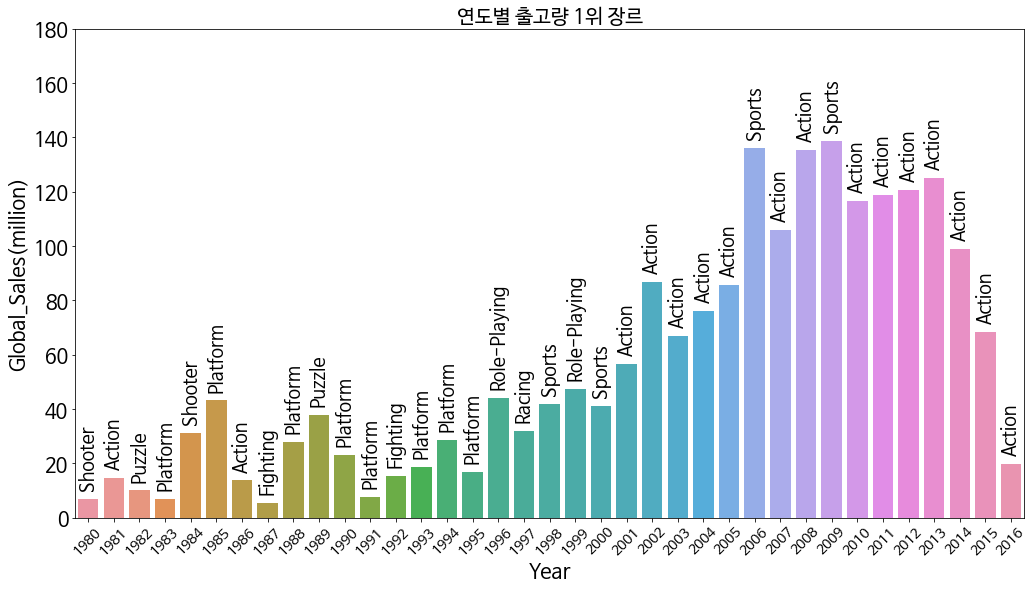

In [98]:
# Visualization

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(17,9))
ax = sns.barplot(x='Year', y='Global_Sales', data=Year_Genre)
idx = 0
for value in Year_Genre['Global_Sales']:
    ax.text(x=idx, y=value + 5, s=Year_Genre.Genre.iloc[idx],
            color='black', size=18, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=20)
plt.ylim([0,180])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Global_Sales(million)', fontsize=20)
ax.set_title('연도별 출고량 1위 장르', fontsize=20)
plt.show();



> 🔎
 - 2001년부터 2009년을 제외하고 모두 **`Action`** 장르의 출고량이 가장 높았던 것을 확인할 수 있습니다.
 - 다음 분기 게임 역시 **`Action`** 장르로 설계하는 것이 적절해 보입니다.


####**2-1-3. 연도별 플랫폼 트렌드**

In [99]:
# 연도별, 플랫폼별 global 출고량 정렬

Year_Platform = pd.DataFrame(vgames2_year.groupby([vgames2_year.Year, vgames2_year.Platform], as_index=False).sum())
Year_Platform.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
Year_Platform.sort_values(['Year', 'Global_Sales'], ascending=[True, False], inplace=True)
Year_Platform.head(10)

,Year,Platform,Global_Sales
0,1980,2600,10.88
1,1981,2600,35.39
2,1982,2600,28.88
4,1983,NES,10.96
3,1983,2600,5.84
6,1984,NES,50.08
5,1984,2600,0.27
9,1985,NES,53.44
7,1985,2600,0.45
10,1985,PC,0.04


In [100]:
# 연도별 출고량이 가장 많은 플랫폼과 출고량

Year_Platform.drop_duplicates(subset=['Year'], keep='first', inplace=True)
Year_Platform.reset_index(drop=True, inplace=True)
Year_Platform.head(10)

,Year,Platform,Global_Sales
0,1980,2600,10.88
1,1981,2600,35.39
2,1982,2600,28.88
3,1983,NES,10.96
4,1984,NES,50.08
5,1985,NES,53.44
6,1986,NES,36.41
7,1987,NES,19.76
8,1988,NES,45.01
9,1989,GB,64.97


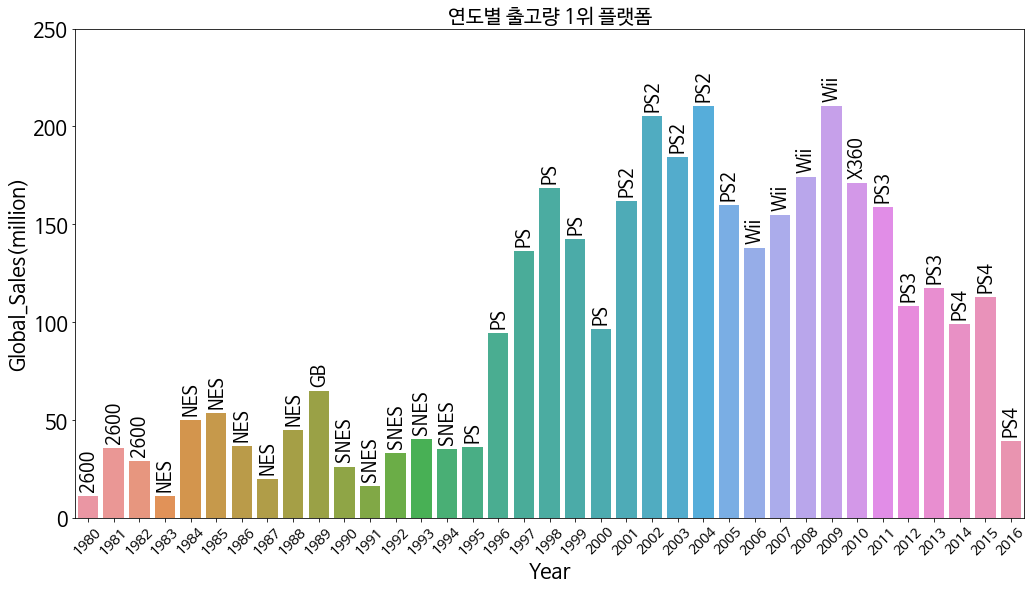

In [101]:
# Visualization

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(17,9))
ax = sns.barplot(x='Year', y='Global_Sales', data=Year_Platform)
idx = 0
for value in Year_Platform['Global_Sales']:
    ax.text(x=idx, y=value + 5, s=Year_Platform.Platform.iloc[idx],
            color='black', size=18, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=20)
plt.ylim([0,250])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Global_Sales(million)', fontsize=20)
ax.set_title('연도별 출고량 1위 플랫폼', fontsize=20)
plt.show();

> 🔎
 - 1995년부터 **`PS`**의 인기가 시작되었다가 2006년 등장한 **`Wii`**가 2009년까지 1위 플랫폼이었음을 확인할 수 있습니다.
 - 2011년부터는 다시 **`PS`** 가 지속적으로 1위 플랫폼입니다.
 - 다음 분기 게임은 **`PS4`** 플랫폼을 통해 지원하는 것이 좋을 것으로 보입니다.

####**2-1-4. 연도별 게임 회사 트렌드**

In [102]:
# 연도별, 게임 회사별 global 출고량 정렬

Year_Publisher = pd.DataFrame(vgames2_year.groupby([vgames2_year.Year, vgames2_year.Publisher], as_index=False).sum())
Year_Publisher.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
Year_Publisher.sort_values(['Year', 'Global_Sales'], ascending=[True, False], inplace=True)
Year_Publisher.head(10)

,Year,Publisher,Global_Sales
1,1980,Atari,8.35
0,1980,Activision,2.53
3,1981,Activision,8.49
4,1981,Atari,8.42
7,1981,Imagic,4.82
11,1981,Parker Bros.,3.35
5,1981,Coleco,2.79
8,1981,Mattel Interactive,2.50
2,1981,20th Century Fox Video Games,1.35
14,1981,Tigervision,1.15


In [103]:
# 연도별 출고량이 가장 많은 게임 회사와 출고량

Year_Publisher.drop_duplicates(subset=['Year'], keep='first', inplace=True)
Year_Publisher.reset_index(drop=True, inplace=True)
Year_Publisher.head(10)

,Year,Publisher,Global_Sales
0,1980,Atari,8.35
1,1981,Activision,8.49
2,1982,Atari,19.43
3,1983,Nintendo,10.96
4,1984,Nintendo,45.55
5,1985,Nintendo,49.95
6,1986,Nintendo,16.17
7,1987,Nintendo,11.95
8,1988,Nintendo,36.44
9,1989,Nintendo,63.87


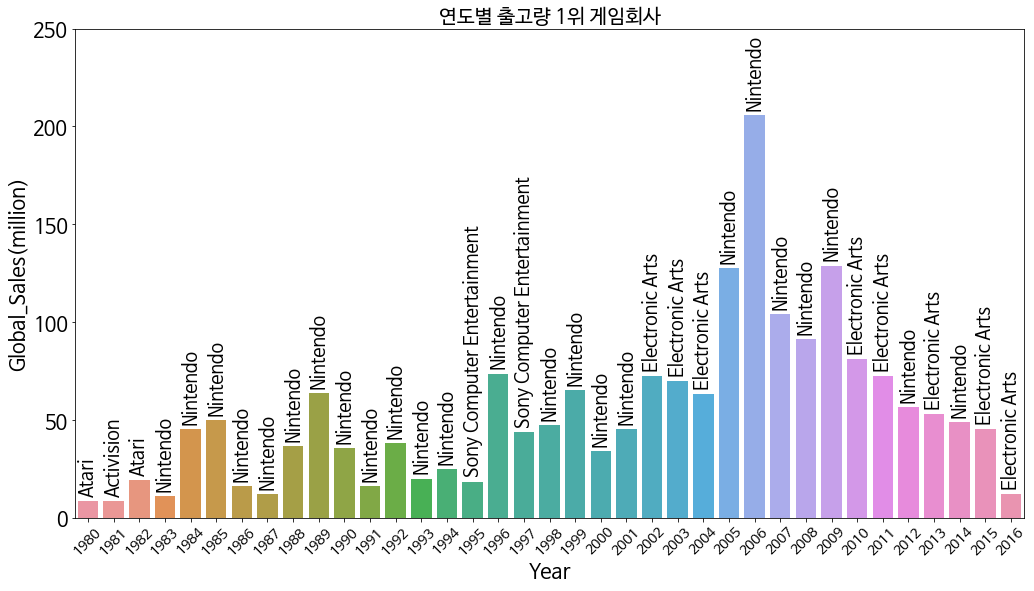

In [104]:
# Visualization

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(17,9))
ax = sns.barplot(x='Year', y='Global_Sales', data=Year_Publisher)
idx = 0
for value in Year_Publisher['Global_Sales']:
    ax.text(x=idx, y=value + 5, s=Year_Publisher.Publisher.iloc[idx],
            color='black', size=18, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=20)
plt.ylim([0,250])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Global_Sales(million)', fontsize=20)
ax.set_title('연도별 출고량 1위 게임회사', fontsize=20)
plt.show();

> 🔎
 - 전 기간동안 **`Nintendo`** 회사가 출시한 게임이 꾸준히 인기를 끌고 있는 것을 볼 수 있습니다.
 - 2002년부터 2004년까지는 **`Electronic Arts`**가 **`Nintendo`**를 제치고 1위를 했음이 보입니다.
 - 다음 분기에도 **`Electronic Arts`** 또는 **`Nintendo`** 회사가 출시한 게임의 출고량이 가장 많을 것으로 예상됩니다.


####**2-1-5. Summary**

> - 다음 분기 게임의 장르는 **`Action`**, 지원 플랫폼은 **`PS`**로 하여 설계해야 합니다.
- 최근 가장 출고량이 높은 게임의 회사는 **`Nintendo`**와 **`Electronic Arts`**이므로 두 회사의 인기 게임을 분석해 비슷한 주제로 게임을 설계해야 합니다.

###**2-2. 지역별 선호 게임 장르**

In [105]:
# 여기부터 vgames2_df 사용

In [106]:
# 게임 장르별 출고량

Genre_sorted = vgames2_df.groupby('Genre', as_index=False).sum()
Genre_sorted.drop(['Year'], axis=1, inplace=True)
Genre_sorted

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,857.49,513.04,155.62,183.92,1710.07
1,Adventure,101.44,63.58,51.48,16.68,233.18
2,Fighting,220.35,99.90,87.10,36.15,443.50
3,Misc,393.64,207.43,104.09,72.47,777.63
4,Platform,445.28,200.45,130.53,51.43,827.69
5,Puzzle,121.32,50.23,56.18,12.42,240.15
6,Racing,354.62,233.90,55.90,76.17,720.59
7,Role-Playing,317.46,182.63,341.59,56.54,898.22
8,Shooter,574.27,310.20,38.18,101.85,1024.50
9,Simulation,181.40,112.89,63.54,31.31,389.14


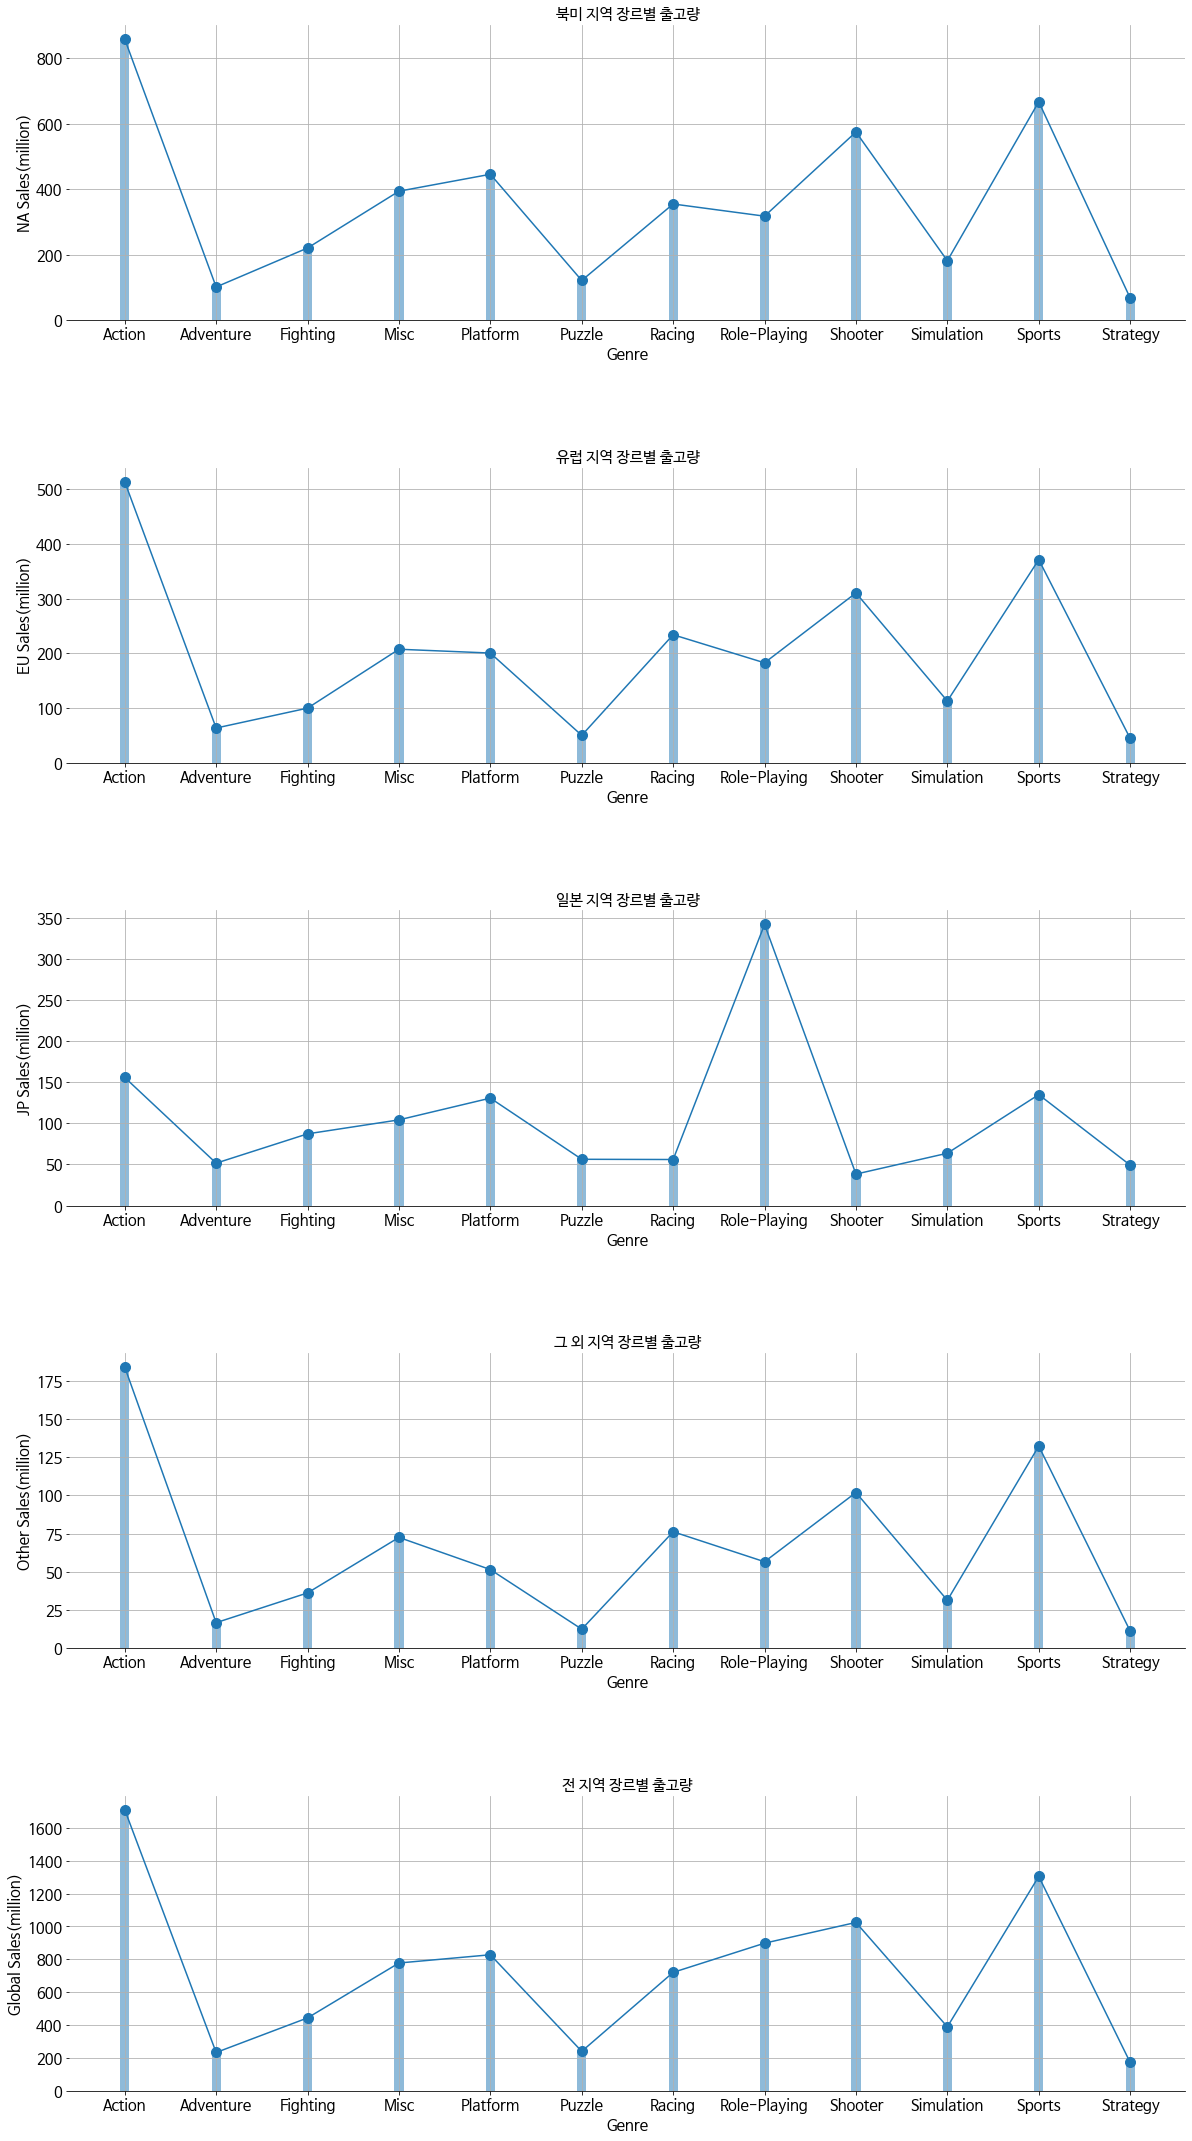

In [107]:
var = [Genre_sorted.NA_Sales, Genre_sorted.EU_Sales, Genre_sorted.JP_Sales, Genre_sorted.Other_Sales, Genre_sorted.Global_Sales]
var_name = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', 'Global Sales']
region = ['북미', '유럽', '일본', '그 외', '전']

fig, ax = plt.subplots(5,1, figsize=[20, 38])

for i in range(len(var)):
  ax[i].bar(x=Genre_sorted.Genre, height=var[i], alpha=0.5, width=0.1)
  ax[i].set_xlabel('Genre')
  ax[i].set_ylabel(f'{var_name[i]}(million)')
  ax[i].set_title(f'{region[i]} 지역 장르별 출고량')

  for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
             ax[i].get_xticklabels() + ax[i].get_yticklabels()):
    item.set_fontsize(15)
  
  ax[i].plot(Genre_sorted.Genre, var[i], marker='o', markersize=10)
  ax[i].grid(True)
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].spines['left'].set_visible(False)

plt.subplots_adjust(hspace=0.5)



🔎  **지역별 선호 게임 장르**
>  - **북미**
   - `Action`, `Sports`, `Shooter`
 - **유럽**
   - `Action`, `Sports`, `Shooter`
 - **일본**
  - `Role_Playing`, `Action`, `Sports`
 - **그 외 지역**
  - `Action`, `Sports`, `Shooter`
 -  **전 지역**
  - `Action`, `Sports`, `Shooter`<br>
<br>
 - **일본을 제외한 모든 지역에서 `Action`, `Sports`, `Shooter`가 인기있는 상위 3개의 장르임이 보입니다.** 
 - **일본의 경우 `Role-Playing` 장르가 가장 인기있음을 확인할 수 있습니다.**

###**2-3. 지역별 선호 게임 플랫폼**

In [108]:
# 게임 플랫폼별 출고량

Platform_sorted = vgames2_df.groupby('Platform', as_index=False).sum()
Platform_sorted.drop(['Year'], axis=1, inplace=True)
Platform_sorted.head(10)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2600,80.05,4.81,0.00,0.83,85.69
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,72.71,54.11,92.81,11.74,231.37
3,DC,5.43,1.69,8.56,0.27,15.95
4,DS,387.42,193.70,174.72,60.19,816.03
5,GB,113.64,47.51,85.12,8.16,254.43
6,GBA,177.34,72.08,46.50,7.49,303.41
7,GC,131.68,38.25,20.88,5.11,195.92
8,GEN,19.27,5.52,2.67,0.89,28.35
9,GG,0.00,0.00,0.04,0.00,0.04


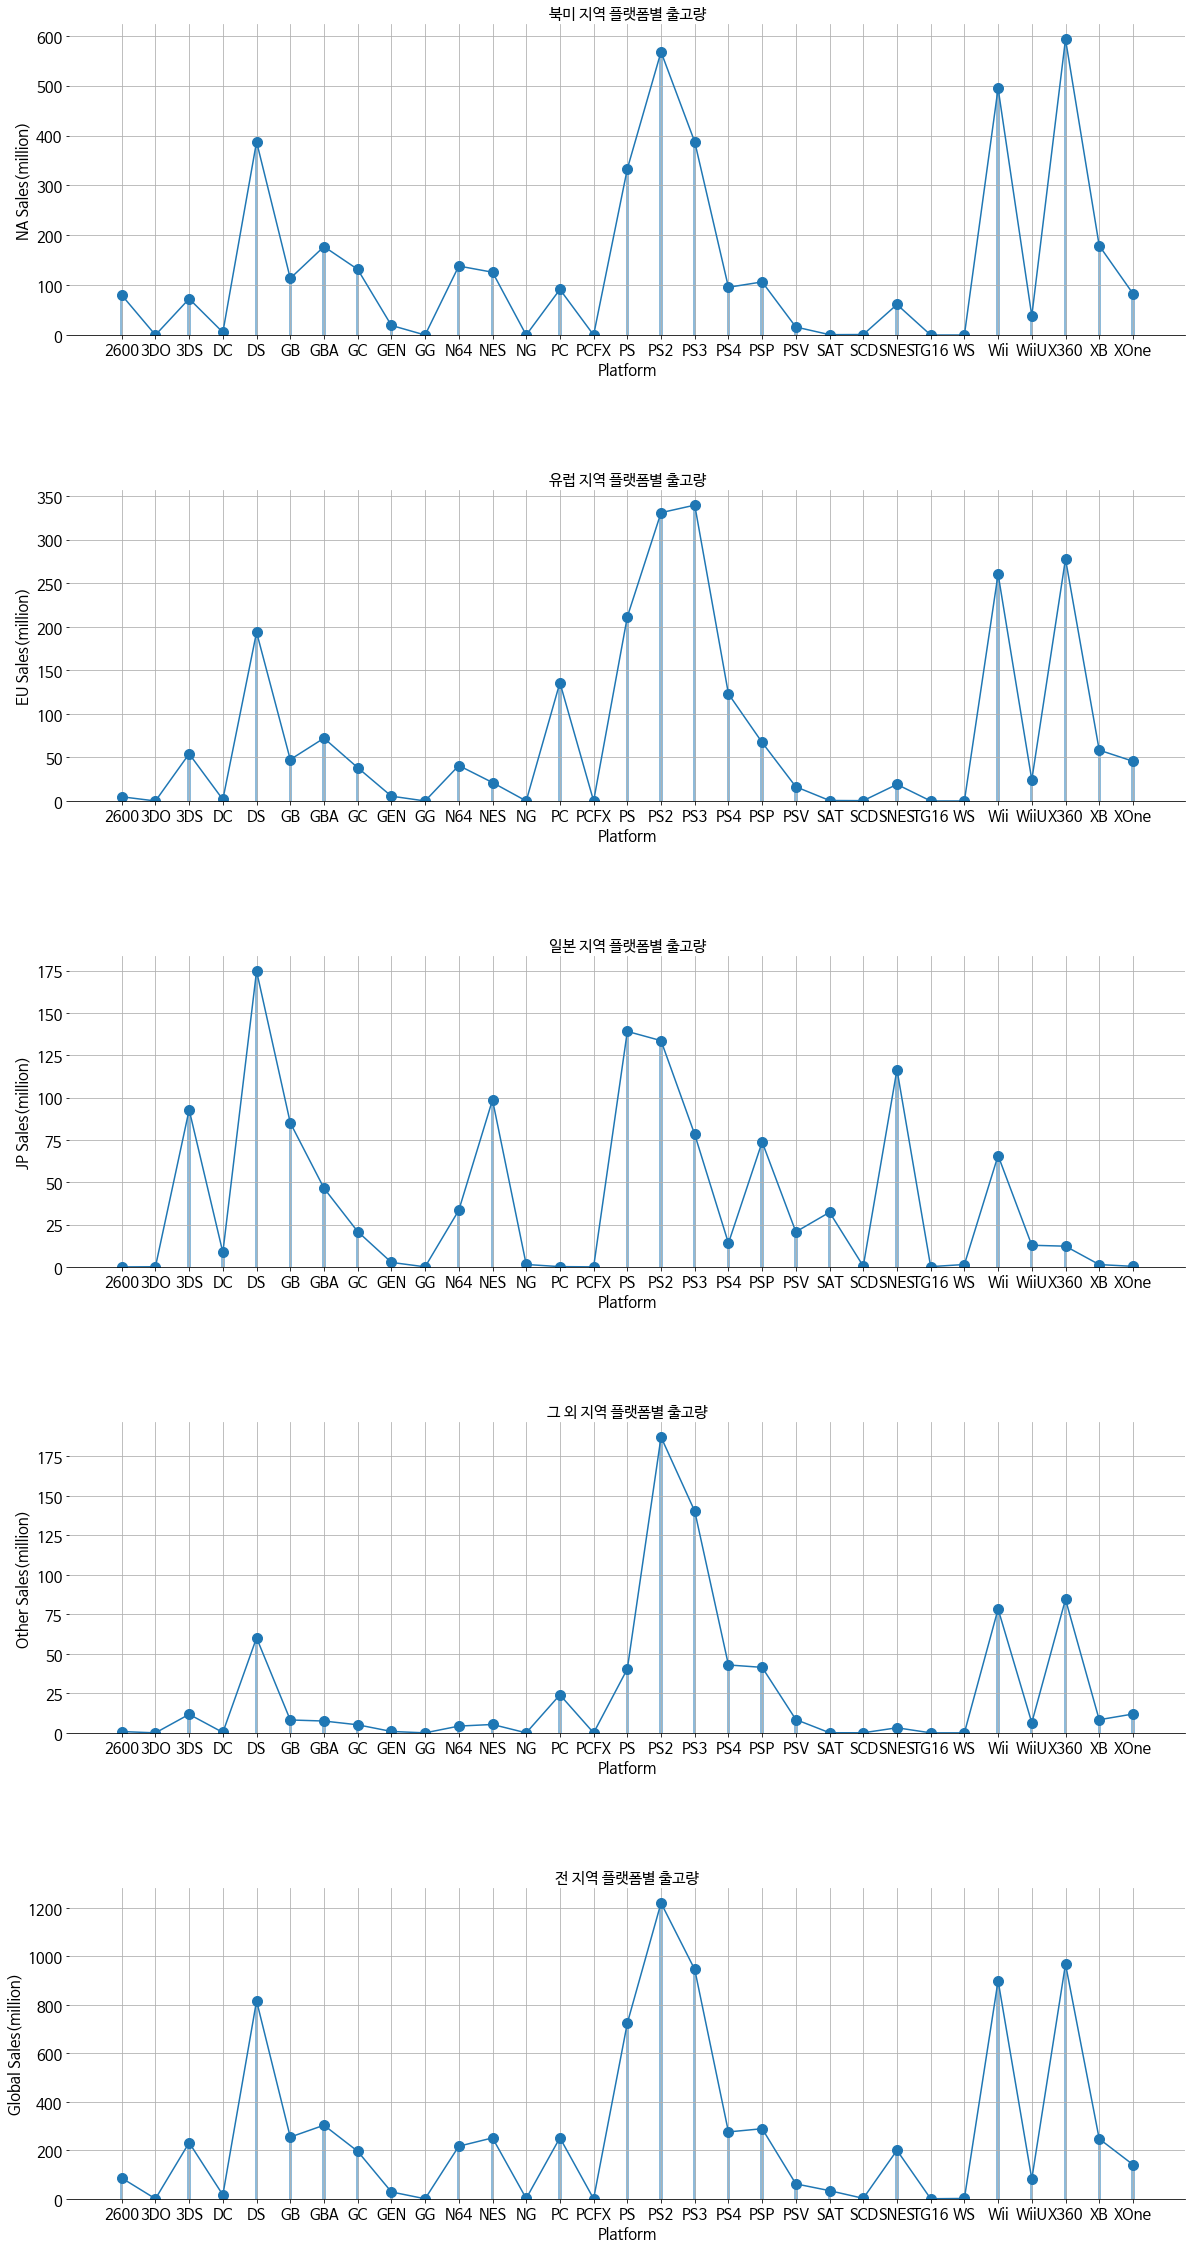

In [109]:
var = [Platform_sorted.NA_Sales, Platform_sorted.EU_Sales, Platform_sorted.JP_Sales, Platform_sorted.Other_Sales, Platform_sorted.Global_Sales]
var_name = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', 'Global Sales']
region = ['북미', '유럽', '일본', '그 외', '전']

fig, ax = plt.subplots(5,1, figsize=[20, 40])

for i in range(len(var)):
  ax[i].bar(x=Platform_sorted.Platform, height=var[i], alpha=0.5, width=0.1)
  ax[i].set_xlabel('Platform')
  ax[i].set_ylabel(f'{var_name[i]}(million)')
  ax[i].set_title(f'{region[i]} 지역 플랫폼별 출고량')

  for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
             ax[i].get_xticklabels() + ax[i].get_yticklabels()):
    item.set_fontsize(15)
  
  ax[i].plot(Platform_sorted.Platform, var[i], marker='o', markersize=10)
  ax[i].grid(True)
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].spines['left'].set_visible(False)

plt.subplots_adjust(hspace=0.5)



🔎  **지역별 선호 게임 플랫폼**
>  - **북미**
   - `X360`, `PS2`, `Wii`, `DS`, `PS3`, `PS`
 - **유럽**
   - `PS3`, `PS2`, `X360`, `Wii`, `PS`, `DS`
 - **일본**
  - `DS`, `PS`, `PS2`, `SNES`, `NES`, `3DS`
 - **그 외 지역**
  - `PS2`, `PS3`, `X360`, `Wii`, `DS`, `PS4`
 -  **전 지역**
  - `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`<br>
<br>
 - **다음 분기 게임을 전 지역을 대상으로 출시할 것이라면 `X360`, `PS2`, `Wii`, `DS`, `PS3`, `PS`에서 플레이가 가능하도록 설계하는 것이 좋겠습니다.**<br><br>
 - **다수의 플랫폼을 지원하는 것이 어렵다면 `PS2`를 지원 플랫폼으로 설정하는 것이 전 지역에서 출고량을 올릴 수 있는 방법으로 보입니다.**<br><br>
 - **일본 지역의 선호 플랫폼을 보면 타 지역들과 다르게 `SNES`, `NES`, `3DS`가 포함되어 있는 것을 볼 수 있습니다.**


###**2-4. 지역별 선호 게임 회사**

In [110]:
# 게임 회사별 출고량

Publisher_sorted = vgames2_df.groupby('Publisher', as_index=False).sum()
Publisher_sorted.drop(['Year'], axis=1, inplace=True)
Publisher_sorted.head(10)

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1,1C Company,0.01,0.07,0.00,0.02,0.10
2,20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.93
3,2D Boy,0.00,0.03,0.00,0.01,0.04
4,3DO,6.48,3.04,0.00,0.63,10.15
5,49Games,0.00,0.04,0.00,0.00,0.04
6,505 Games,31.69,16.43,2.05,5.43,55.60
7,5pb,0.02,0.00,1.61,0.00,1.63
8,7G//AMES,0.00,0.06,0.00,0.00,0.06
9,989 Sports,0.21,0.14,0.00,0.02,0.37


In [111]:
# 북미 지역 출고량이 높은 회사 Top10
NA_Publisher = Publisher_sorted.sort_values('NA_Sales', ascending=False).head(10).iloc[:, :2]
NA_Publisher.reset_index(drop=True, inplace=True)
NA_Publisher

,Publisher,NA_Sales
0,Nintendo,808.14
1,Electronic Arts,579.90
2,Activision,425.10
3,Sony Computer Entertainment,263.70
4,Ubisoft,252.26
5,Take-Two Interactive,220.46
6,THQ,208.47
7,Microsoft Game Studios,155.35
8,Sega,108.57
9,Atari,101.23


In [112]:
# 유럽 지역 출고량이 높은 회사 Top10
EU_Publisher = Publisher_sorted.sort_values('EU_Sales', ascending=False).head(10)[["Publisher", "EU_Sales"]]
EU_Publisher.reset_index(drop=True, inplace=True)
EU_Publisher

,Publisher,EU_Sales
0,Nintendo,410.34
1,Electronic Arts,366.11
2,Activision,213.17
3,Sony Computer Entertainment,186.74
4,Ubisoft,162.99
5,Take-Two Interactive,117.16
6,THQ,94.60
7,Sega,81.20
8,Microsoft Game Studios,68.61
9,Konami Digital Entertainment,68.53


In [113]:
# 일본 지역 출고량이 높은 회사 Top10
JP_Publisher = Publisher_sorted.sort_values('JP_Sales', ascending=False).head(10)[["Publisher", "JP_Sales"]]
JP_Publisher.reset_index(drop=True, inplace=True)
JP_Publisher

,Publisher,JP_Sales
0,Nintendo,447.43
1,Namco Bandai Games,126.70
2,Konami Digital Entertainment,90.93
3,Sony Computer Entertainment,73.72
4,Capcom,67.38
5,Sega,55.57
6,Square Enix,47.46
7,SquareSoft,39.44
8,Enix Corporation,32.40
9,Tecmo Koei,29.21


In [114]:
# 그 외 지역 출고량이 높은 회사 Top10
Other_Publisher = Publisher_sorted.sort_values('Other_Sales', ascending=False).head(10)[["Publisher", "Other_Sales"]]
Other_Publisher.reset_index(drop=True, inplace=True)
Other_Publisher

,Publisher,Other_Sales
0,Electronic Arts,127.19
1,Nintendo,93.67
2,Sony Computer Entertainment,79.42
3,Activision,74.55
4,Take-Two Interactive,55.12
5,Ubisoft,50.12
6,THQ,32.10
7,Konami Digital Entertainment,29.89
8,Sega,24.22
9,Microsoft Game Studios,18.56


In [115]:
# 전 지역 출고량이 높은 회사 Top10
Global_Publisher = Publisher_sorted.sort_values('Global_Sales', ascending=False).head(10)[["Publisher", "Global_Sales"]]
Global_Publisher.reset_index(drop=True, inplace=True)
Global_Publisher

,Publisher,Global_Sales
0,Nintendo,1759.58
1,Electronic Arts,1087.18
2,Activision,719.36
3,Sony Computer Entertainment,603.58
4,Ubisoft,472.70
5,Take-Two Interactive,398.57
6,THQ,340.18
7,Konami Digital Entertainment,277.89
8,Sega,269.56
9,Namco Bandai Games,252.80


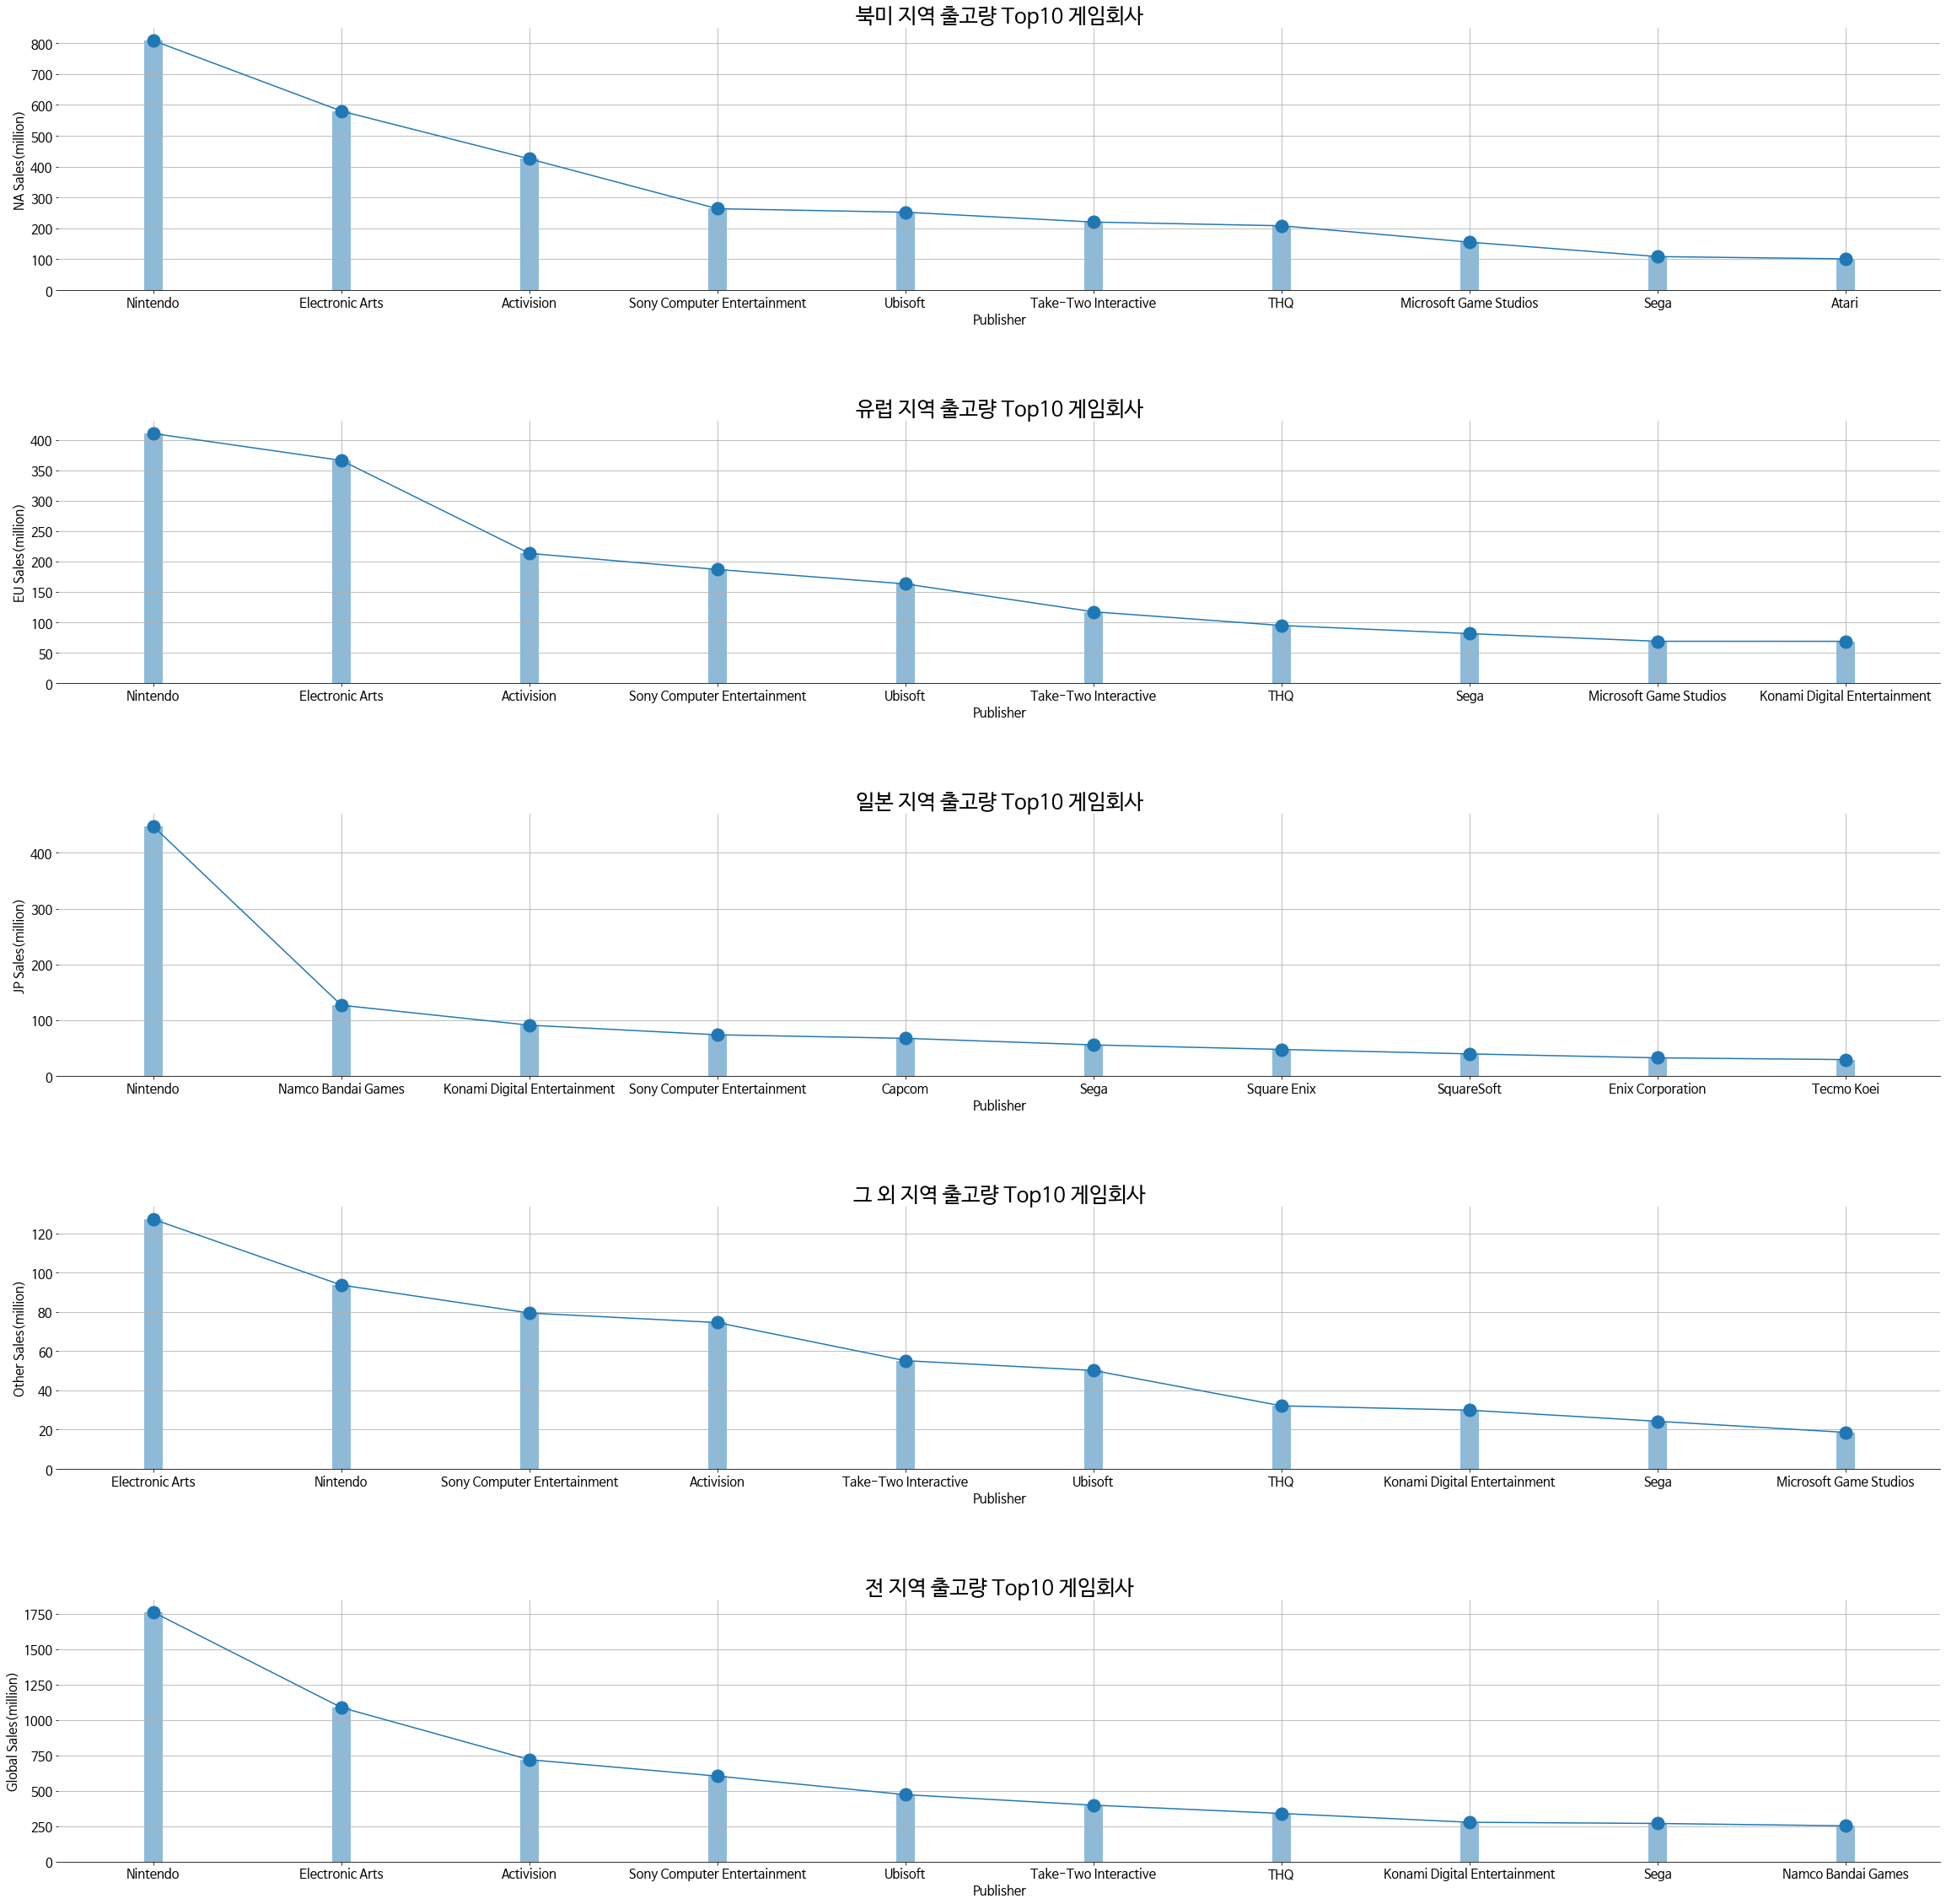

In [116]:
# Visualization

var = [NA_Publisher, EU_Publisher, JP_Publisher, Other_Publisher, Global_Publisher]
var_name = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales', 'Global Sales']
region = ['북미', '유럽', '일본', '그 외', '전']

fig, ax = plt.subplots(5,1, figsize=[40, 40])

for i in range(len(var)):
  ax[i].bar(x=var[i].Publisher, height=var[i].iloc[:, 1], alpha=0.5, width=0.1)
  ax[i].set_xlabel('Publisher')
  ax[i].set_ylabel(f'{var_name[i]}(million)')
  ax[i].set_title(f'{region[i]} 지역 출고량 Top10 게임회사')

  for item in ([ax[i].xaxis.label, ax[i].yaxis.label] +
             ax[i].get_xticklabels() + ax[i].get_yticklabels()):
    item.set_fontsize(15)

  ax[i].title.set_fontsize(25) 
  
  ax[i].plot(var[i].Publisher, var[i].iloc[:, 1], marker='o', markersize=15)
  ax[i].grid(True)
  ax[i].spines['top'].set_visible(False)
  ax[i].spines['right'].set_visible(False)
  ax[i].spines['left'].set_visible(False)

plt.subplots_adjust(hspace=0.5)

In [117]:
# 일본 지역 Electronic Arts 사의 출고량 순위

Publisher_sorted.sort_values('JP_Sales', ascending=False).head(20)[["Publisher", "JP_Sales"]].reset_index(drop=True)    # 13위

,Publisher,JP_Sales
0,Nintendo,447.43
1,Namco Bandai Games,126.70
2,Konami Digital Entertainment,90.93
3,Sony Computer Entertainment,73.72
4,Capcom,67.38
5,Sega,55.57
6,Square Enix,47.46
7,SquareSoft,39.44
8,Enix Corporation,32.40
9,Tecmo Koei,29.21


🔎  **지역별 선호 게임 회사**
>- **북미/유럽**
  - 북미와 유럽 지역의 경우, 출고량 Top10 게임회사가 거의 비슷합니다.  
- **일본**
  - `Nintendo`사의 출고량이 압도적으로 높고, 북미와 유럽 지역에서는 뒤처져 있었던 `Namco Bandai Games`와 `Konami Digital Entertainment`사가 각각 2, 3위의 자리를 차지하고 있습니다.
  - 일본 외 지역에서 모두 출고량 2위 안에 드는 `Electronic Arts`사는 일본 지역에서 출고량 10위 안에 들지 못하는 것을 확인할 수 있습니다.
  - 일본에서 `Electronic Arts` 사의 출고량 순위는 13위입니다.
- **전 지역**
 - 북미/유럽/일본에 이어 전 지역에서 출고량이 1위인 회사는 `Nintendo`입니다.

- 다음 분기 게임 설계 시, `Nintendo`사의 인기 게임들이 출고량이 높을 수 있었던 요인을 분석하는 것이 하나의 전략이 될 수 있을 듯 해보입니다.

🔎  **지역별 선호 게임 회사**
>- **북미/유럽**
  - 출고량 Top10 게임회사가 거의 비슷  
- **일본**
  - `Nintendo`사의 출고량이 압도적으로 높고, 북미와 유럽 지역에서는 뒤처져 있었던 `Namco Bandai Games`와 `Konami Digital Entertainment`사가 각각 2, 3위의 자리를 차지
  - 일본 외 지역에서 모두 출고량 2위 안에 드는 `Electronic Arts`사는 일본 지역에서 출고량 13위
- **전 지역**
 - 북미/유럽/일본에 이어 전 지역에서 출고량이 1위인 회사는 `Nintendo`

- `Nintendo`사의 인기 게임들이 출고량이 높을 수 있었던 요인을 분석하는 것이 하나의 전략이 될 수 있을 듯 해보임

###**2-5. 2010~2016년 출고량 Top20 게임**

####**2-5-1. 2010~2016년 출고량 Top20 게임**
- 2010~2016년 출시된 게임중 출고량 상위 20개 게임

In [118]:
# 플랫폼만 다른 게임들 병합

vgames2_wo_platform = vgames2_df.groupby(['Name', 'Year', 'Genre', 'Publisher'], as_index=False).sum()

In [119]:
# 전 지역 출고량 Top20 게임(2010~2016년 출시)

ten_to_16 = vgames2_wo_platform[vgames2_wo_platform.Year >= 2010]
top_20 = ten_to_16.sort_values('Global_Sales', ascending=False).head(20)
top_20.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace=True)
top_20.reset_index(drop=True, inplace=True)
top_20

,Name,Year,Genre,Publisher,Global_Sales
0,Grand Theft Auto V,2013,Action,Take-Two Interactive,37.77
1,Call of Duty: Modern Warfare 3,2011,Shooter,Activision,30.84
2,Call of Duty: Black Ops II,2012,Shooter,Activision,29.73
3,Call of Duty: Black Ops,2010,Shooter,Activision,29.41
4,Call of Duty: Ghosts,2013,Shooter,Activision,27.37
5,Call of Duty: Black Ops 3,2015,Shooter,Activision,25.30
6,Call of Duty: Advanced Warfare,2014,Shooter,Activision,21.89
7,Kinect Adventures!,2010,Misc,Microsoft Game Studios,21.82
8,The Elder Scrolls V: Skyrim,2011,Role-Playing,Bethesda Softworks,19.28
9,FIFA 15,2014,Sports,Electronic Arts,19.02




🔎 **2010~2016년 출시 게임 중 출고량 Top20 게임**
> - **Name** 컬럼을 살펴보면 같은 게임의 다른 시리즈들이 다수 포함되어 있는 것을 확인할 수 있습니다.
- **`Call of Duty`** 시리즈가 6개로 가장 많고, 연마다 출시되는 **`FIFA`** 시리즈가 5개, **`Grand Theft Auto V`, `Battlefield`, `Assassin's Creed`**가 각각 2개씩 Top20위 안에 드는 것을 확인할 수 있습니다.




####**2-5-2. Top20의 장르 분포**

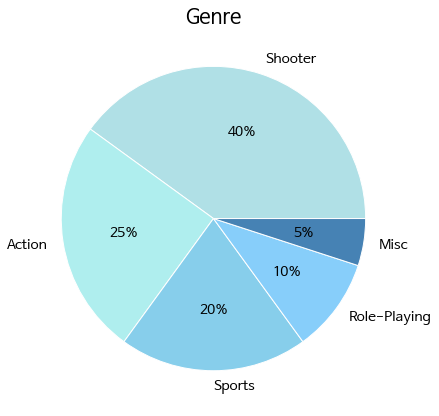

In [120]:
# 출고량 Top20 게임에서 Genre의 분포

plt.figure(figsize=[7,7])
genre = top_20.value_counts(subset='Genre')
plt.pie(genre, labels=genre.index, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, autopct='%.0f%%', 
        colors=['powderblue', 'paleturquoise', 'skyblue', 'lightskyblue', 'steelblue', 'cornflowerblue', 'royalblue',  'lightgrey', 'slategrey'], textprops={'fontsize': 14})
plt.title('Genre', fontsize=20)
plt.show();


🔎 **Top20 게임 장르 분포**
> - **`Call of Duty`** 시리즈와 **`Battlefield`**의 영향으로 Top20 게임 중 `Shooter` 장르의 비중이 가장 높은 것을 확인할 수 있습니다.



####**2-5-3. Top20의 게임 회사 분포**

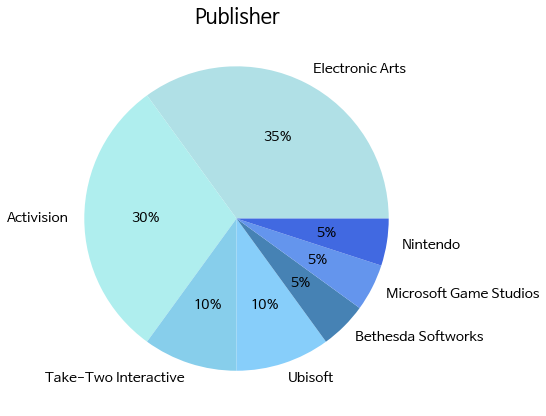

In [121]:
# 출고량 Top20 게임에서 Publisher의 분포

plt.figure(figsize=[7,7])
publisher = top_20.value_counts(subset='Publisher')
plt.pie(publisher, labels=publisher.index, autopct='%.0f%%', 
        colors=['powderblue', 'paleturquoise', 'skyblue', 'lightskyblue', 'steelblue', 'cornflowerblue', 'royalblue'], textprops={'fontsize': 14})
plt.title('Publisher', fontsize=20)
plt.show();

🔎 **Top20 게임 회사 분포**
> - **`Electronic Arts`**사와 **`Activision`**사의 게임이 Top20 게임에서 가장 많은 비중을 차지


#**Part 3. Conclusion**

###**1. 장르**

- **`Action`, `Sports`, `Shooter`** 장르로 게임 설계
- 일본 지역을 타겟으로 설계한다면 **`Role-Playing`** 장르

###**2. 플랫폼**
- **`PS`, `DS`** 에서 게임을 지원하도록 설계
- 다수의 플랫폼 선택이 어렵다면 **`PS`** 선택
- 일본 지역만 타겟으로 설계한다면 **`DS`** 선택

###**3. 게임회사**
 - **`Nintendo`, `Electronic Arts`, `Activision`** 세 회사의 인기 게임을 분석 및 전략 설계
 - 일본 지역만 타겟으로 설계한다면 **`Nintendo`**사를 주력 분석